<a href="https://colab.research.google.com/github/mvoassis/is_covid_over_in_brazil/blob/main/A_COVID_acabou_no_Brasil%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Pandemia de COVID-19 acabou no Brasil?
#### Marcos V. O. Assis (marcos.assis@ufpr.br)
#### Universidade Federal do Paraná

***

> Resposta curta: Não

***

**Perguntas a se responder:**

1. As pessoas não se infectam mais?
2. As pessoas tem morrido menos? 
3. As pessoas estão vacinadas? 
4. Quem está mais vulnerável agora? 

**Relatório + código**

* Caso não se interesse pela programação, pode pular para os gráficos e textos ;)
* Caso prefira ouvir/assistir, sugiro este [vídeo](https://youtu.be/C8SyK87_v2s).

**Bases de dados**

* Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19) e Universidade Federal de Viçosa (https://github.com/wcota/covid19br)
* Ministério da Saúde - Brasil - Banco de Dados de Síndrome Respiratória Aguda Grave - incluindo dados da COVID-19 (https://opendatasus.saude.gov.br/dataset/srag-2021-e-2022)
 
**Data em que a análise foi executada**

* 18 de julho de 2022

***

# 1 - As pessoas não se infectam mais?

Com algumas medidas recentes, como a retirada da obrigatoriedade do uso de máscaras em locais fechados, e o fim do estado de emergência sanitária decretado pelo Ministério da Saúde, parece que as pessoas não se infectam mais (ou que a taxa de infecção esteja bem baixa).

> Mas será que isso é verdade? 

Primeiro, vamos observar o número de novos casos de COVID-19 no Brasil: 

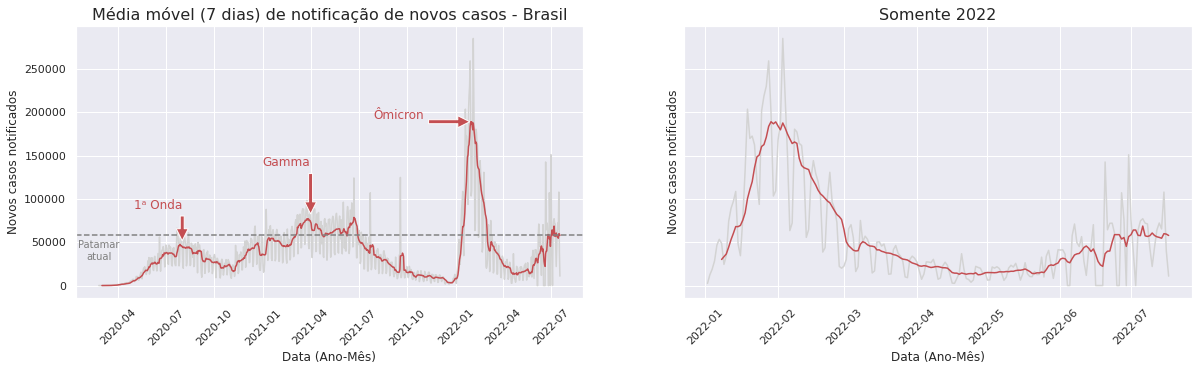

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

ufv_states = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
ufv_states.date = pd.to_datetime(ufv_states.date, format='%Y-%m-%d')
ufv2022 = ufv_states[ufv_states.date > '2022-1-1']

brasil = ufv_states.query('state == "TOTAL"').groupby('date').sum()
brasil2022 = ufv2022.query('state == "TOTAL"').groupby('date').sum()

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), sharey=True)
ax1.plot(brasil.newCases, color='lightgray')
ax1.plot(brasil.newCases.rolling(7).mean(), color='r')
ax1.set_title('Média móvel (7 dias) de notificação de novos casos - Brasil', fontsize=16)
ax1.set_ylabel('Novos casos notificados')
ax1.set_xlabel('Data (Ano-Mês)')
ax1.tick_params(axis='x', rotation=45)
ax1.axhline(brasil.newCases.rolling(7).mean().iloc[-1], color ='gray', linestyle='--')
ax1.annotate('Ômicron', xy=(pd.to_datetime('2022-2'), brasil.newCases.rolling(7).mean().max()) ,  xycoords='data', 
            xytext=(pd.to_datetime('2021-11'), brasil.newCases.rolling(7).mean().max()), textcoords='data', color='r',
            arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom',
            )
ax1.annotate('1ᵃ Onda', xy=(pd.to_datetime('2020-8'), 50000) ,  xycoords='data', 
            xytext=(pd.to_datetime('2020-8'), 100000), textcoords='data', color='r',
            arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
ax1.annotate('Gamma', xy=(pd.to_datetime('2021-4'), 80000) ,  xycoords='data', 
            xytext=(pd.to_datetime('2021-4'), 150000), textcoords='data', color='r',
            arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

ax1.annotate('Patamar\natual', xy=(ufv_states.date.iloc[0], brasil.newCases.rolling(7).mean().iloc[-1]-5000) ,  xycoords='data', 
            #xytext=(pd.to_datetime('2021-'), 150000), textcoords='data', color='r',
            horizontalalignment='center', verticalalignment='top', color='gray', fontsize=10
            )

ax2.plot(brasil2022.newCases, color='lightgray')
ax2.plot(brasil2022.newCases.rolling(7).mean(), color='r')
ax2.set_title('Somente 2022', fontsize=16)
ax2.set_ylabel('Novos casos notificados')
ax2.set_xlabel('Data (Ano-Mês)')
ax2.tick_params(rotation=45)

ax2 = ax2

Dá para notar o que pode ser o início de uma queda no número de casos, ou ao menos uma estabilização. 

Perto dos casos do início do ano (Ômicron), a quantidade está bem baixa. Entretanto, no início de julho, a quantidade de novos casos era equivalente às taxas que obtivemos no pior momento de 2021, com a onda causada pela variante Gamma. 

Na data de hoje, temos um patamar superior ao pior momento de 2020. 

> Mas será que o patamar atual é o real? 

Pra responder isso, podemos considerar a quantidade de testes realizados. Afinal, casos só são confirmados se são testados, não é mesmo?

***

**Fonte:** [Boletim Epidemiológico Nº 118- Boletim COE Coronavírus](https://www.gov.br/saude/pt-br/centrais-de-conteudo/publicacoes/boletins/boletins-epidemiologicos/covid-19/2022/boletim-epidemiologico-no-118-boletim-coe-coronavirus.pdf/view) - Página 74

**Dados do GAL (Gerenciador de Ambiente Laboratorial) - 2022** (dados indisponíveis em formato .csv, então inseri manualmente para a geração do gráfico.)



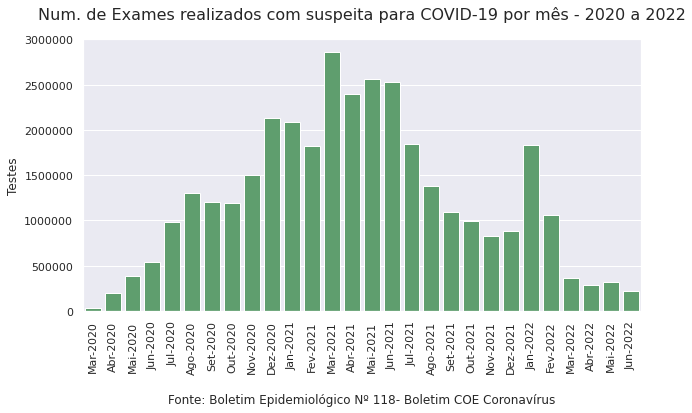

In [215]:
gal_data = [35703, 200987, 392396, 539321, 978909, 1304995, 1204862, 
            1196056, 1501346, 2127809, 2092625, 1819095, 2857883, 2398909, 
            2566896, 2526071, 1847511, 1383967, 1088724, 994522, 828174,
            879327, 1833777, 1062048, 364262, 292720, 321034, 218269]

gal_label = ['Mar-2020', 'Abr-2020', 'Mai-2020', 'Jun-2020', 'Jul-2020', 'Ago-2020', 'Set-2020', 'Out-2020', 'Nov-2020', 'Dez-2020',
             'Jan-2021','Fev-2021','Mar-2021', 'Abr-2021', 'Mai-2021', 'Jun-2021', 'Jul-2021', 'Ago-2021', 'Set-2021', 'Out-2021', 'Nov-2021', 'Dez-2021',
             'Jan-2022','Fev-2022','Mar-2022', 'Abr-2022', 'Mai-2022', 'Jun-2022']

gal = pd.DataFrame(gal_data, index=gal_label, columns=['Testes'])

plt.figure(figsize=(10,5))
sns.barplot(data = gal, x=gal.index, y='Testes', color="g")
plt.xticks(rotation=90)
plt.title('Num. de Exames realizados com suspeita para COVID-19 por mês - 2020 a 2022', fontsize=16, pad=20)
plt.ylabel('Testes')
plt.xlabel('\nFonte: Boletim Epidemiológico Nº 118- Boletim COE Coronavírus')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

Aqui vemos um dado curioso: Nos últimos 4 meses, a quantidade de testes realizados tem sido inferior à todo o ano de 2021, e equivalente ao mês de Abril de 2020 (início da pandemia, não haviam testes disponíveis.)

**Analisando em conjunto a quantidade de testes e o número de novos casos:**

Ora, se testamos pouco, e temos muitos casos... pela lógica, se mais testes fossem realizados, maiores seriam os números de casos estimados. 

* Extrapolando uma porção de variáveis para uma estimativa simples; 
* Considerando que a proporção de casos positivos para COVID-19 nos testes seja de 22.62% (proporção relativa aos últimos 15 dias do [Boletim Epidemiológico Nº 118- Boletim COE Coronavírus](https://www.gov.br/saude/pt-br/centrais-de-conteudo/publicacoes/boletins/boletins-epidemiologicos/covid-19/2022/boletim-epidemiologico-no-118-boletim-coe-coronavirus.pdf/view) - Página 77);
* Finalmente, considerando que estivéssemos realizando a quantidade média de testes de 2021 nos últimos 4 meses (março a junho de 2022)

Teríamos em torno de 330 mil novos casos (ADICIONAIS aos do primeiro gráfico) por mês, algo em torno de 10 mil novos casos por dia:

In [216]:
# diferença de testes, 22.62% em cima da diferença, e soma com os positivos

media_testes_2021 = np.mean(gal_data[10:22])

dif_testes_marco_2022 = media_testes_2021 - gal_data[24]
dif_testes_abril_2022 = media_testes_2021 - gal_data[25]
dif_testes_maio_2022 = media_testes_2021 - gal_data[26]
dif_testes_junho_2022 = media_testes_2021 - gal_data[27]

add_positivos_marco_2022 = round((dif_testes_marco_2022*0.2262))
add_positivos_abril_2022 = round((dif_testes_abril_2022*0.2262))
add_positivos_maio_2022= round((dif_testes_maio_2022*0.2262))
add_positivos_junho_2022 = round((dif_testes_junho_2022*0.2262))

print(f'Considerando uma média de {round(media_testes_2021)} testes para os meses de março a junho, teríamos:\n ')
print(f'Novos casos positivos adicionais em Março - 2022: {add_positivos_marco_2022}')
print(f'Novos casos positivos adicionais em Abril - 2022: {add_positivos_abril_2022}')
print(f'Novos casos positivos adicionais em Maio - 2022: {add_positivos_maio_2022}')
print(f'Novos casos positivos adicionais em Junho - 2022: {add_positivos_junho_2022}')
print(f'\nMédia de {round((add_positivos_marco_2022+add_positivos_abril_2022+add_positivos_maio_2022+add_positivos_junho_2022)/4)} novos casos por mês.')



Considerando uma média de 1773642 testes para os meses de março a junho, teríamos:
 
Novos casos positivos adicionais em Março - 2022: 318802
Novos casos positivos adicionais em Abril - 2022: 334985
Novos casos positivos adicionais em Maio - 2022: 328580
Novos casos positivos adicionais em Junho - 2022: 351825

Média de 333548 novos casos por mês.


Mas por que motivo tão poucos testes estão sendo feitos? Essa base de dados não nos dá muita informação sobre... mas recomendo que assistam essa live para ter mais informações com um especialista da área [(clique aqui)](https://youtu.be/C8SyK87_v2s). 

Alguns pontos que TALVEZ expliquem essa situação:

* Brasil mantém política de testes apenas em casos sintomáticos;
* Casos em pessoas vacinadas tendem a possuir sintomas mais leves, ou serem assintomáticos.
* Com a disponibilidade de testes rápidos em farmácias, pode ocorrer de novos positivados não procurarem o serviço público para notificação ou realização de teste. 

O que nos leva à pergunta 2.

# 2 - As pessoas tem morrido menos?

Como visto, a quantidade de casos continua alta, mas aparentemente o número de mortes tem diminuido. Será que os números confirmam isso? 

In [217]:
brasil['letalidade_1'] = brasil['deaths']/brasil['totalCases']
brasil['letalidade_2'] = brasil['deaths']/brasil['totalCases']

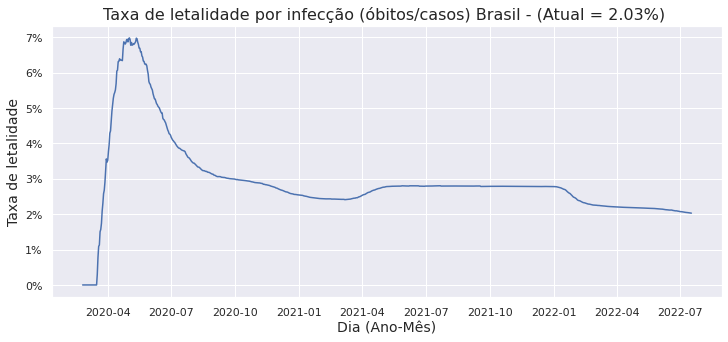

In [218]:
#Infection fatality rate (IFR)
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=brasil, x=brasil.index, y='letalidade_1')
ax.set_title(f'Taxa de letalidade por infecção (óbitos/casos) Brasil - (Atual = {round(brasil.letalidade_1.iloc[-1]*100,2)}%) ', fontsize=16)
ax.set_ylabel('Taxa de letalidade', fontsize=14)
ax.set_xlabel('Dia (Ano-Mês)', fontsize=14)
ax.set_yticklabels([str(x)+'%' for x in range(-1,8)] )
ax=ax

A taxa de letalidade por infecção é uma métrica bem simples, que normalmente superestima a taxa de mortalidade real pois, como já visto, nem todos os casos de covid são testados. Ainda assim, é possível observar uma tendência de queda, com a menor taxa desde o início da pandemia. 

Para continuar a avaliar, podemos ver o gráfico da quantidade de novos óbitos diários desde o início da pandemia, visualizado a seguir:

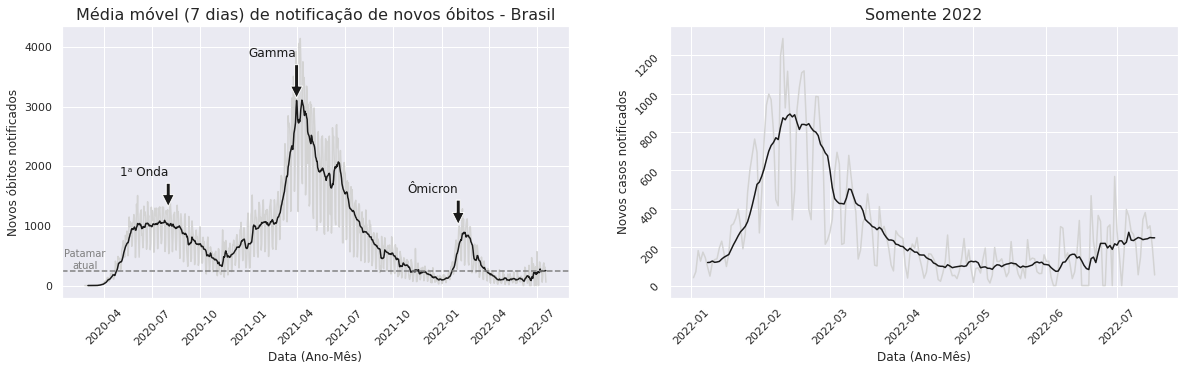

In [219]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), sharey=False)
ax1.plot(brasil.newDeaths, color='lightgray')
ax1.plot(brasil.newDeaths.rolling(7).mean(), color='k')
ax1.set_title('Média móvel (7 dias) de notificação de novos óbitos - Brasil', fontsize=16)
ax1.set_ylabel('Novos óbitos notificados')
ax1.set_xlabel('Data (Ano-Mês)')
ax1.tick_params(axis='x', rotation=45)

ax1.axhline(brasil.newDeaths.rolling(7).mean().iloc[-1], color ='gray', linestyle='--')
ax1.annotate('Ômicron', xy=(pd.to_datetime('2022-2'), 1000) ,  xycoords='data', 
            xytext=(pd.to_datetime('2022-2'), 1500), textcoords='data', color='k',
            arrowprops=dict(facecolor='k', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom',
            )
ax1.annotate('1ᵃ Onda', xy=(pd.to_datetime('2020-8'), 1300) ,  xycoords='data', 
            xytext=(pd.to_datetime('2020-8'), 2000), textcoords='data', color='k',
            arrowprops=dict(facecolor='k', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
ax1.annotate('Gamma', xy=(pd.to_datetime('2021-4'), brasil.newDeaths.rolling(7).mean().max()) ,  xycoords='data', 
            xytext=(pd.to_datetime('2021-4'), 4000), textcoords='data', color='k',
            arrowprops=dict(facecolor='k', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

ax1.annotate('Patamar\natual', xy=(ufv_states.date.iloc[0], brasil.newDeaths.rolling(7).mean().iloc[-1]) ,  xycoords='data', 
            #xytext=(pd.to_datetime('2021-'), 150000), textcoords='data', color='k',
            horizontalalignment='center', verticalalignment='bottom', color='gray', fontsize=10
            )

ax2.plot(brasil2022.newDeaths, color='lightgray')
ax2.plot(brasil2022.newDeaths.rolling(7).mean(), color='k')
ax2.set_title('Somente 2022', fontsize=16)
ax2.set_ylabel('Novos casos notificados')
ax2.set_xlabel('Data (Ano-Mês)')
ax2.tick_params(rotation=45)

ax2 = ax2

Felizmente os números confirmam que estamos com menos casos de óbitos diários que em qualquer dia de 2020 e 2021, salvo no início da pandemia. Em janeiro de 2022 atingimos as menores taxas de óbitos. 

Embora os números tenham voltado a crescer (superando a taxa de 200 óbitos diários na média móvel de 7 dias), os valores continuam incomparáveis às terríveis taxas de 2021.

Em comparação com as taxas de novos casos confirmados, o gigantesco pico de novos casos causados pela variante Ômicron gerou sim um aumento na taxa de novos óbitos diários, mas os óbitos permaneceram mais baixos que nos anos de 2020 e 2021. 

> Mas o que pode ter causado tamanha desaceleração no número de mortes? 

Spoiler: Vacinas! 

# 3 - As pessoas estão vacinadas?

Vimos que a taxa de óbitos vem caindo desde o segundo semestre de 2021, e que o pico de novos casos devido à Ômicron não refletiu em proporção equivalente no número de óbitos. 

> Será que o motivo são as vacinas? 

Sim.

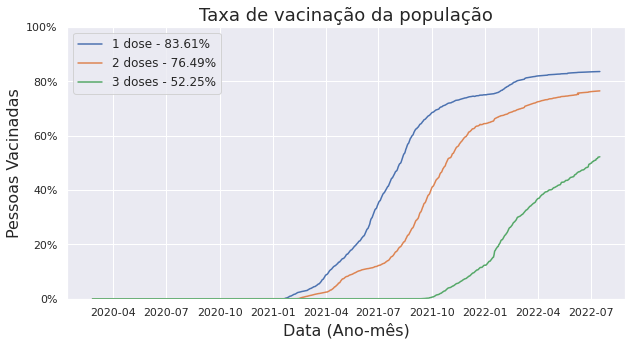

In [220]:
# população do brasil 2022 projeção ibge
# https://www.ibge.gov.br/apps/populacao/projecao/index.html
populacao = 214849734

vacina = ufv_states.query('state == "TOTAL"')[['date', 'vaccinated', 'vaccinated_second', 'vaccinated_third']]
vacina = vacina.groupby('date').sum()
vacina_perc = vacina/populacao
# vacina_perc.plot()

plt.figure(figsize=(10,5))
plt.plot(vacina_perc)
plt.ylim([0,1])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], labels=[str(x)+'%' for x in range(0,120,20)])
plt.ylabel('Pessoas Vacinadas', fontsize=16)
plt.xlabel('Data (Ano-mês)', fontsize=16)
plt.title('Taxa de vacinação da população', fontsize=18,)
plt.legend([f'1 dose - {round(vacina_perc.vaccinated.iloc[-1]*100,2)}%', 
            f'2 doses - {round(vacina_perc.vaccinated_second.iloc[-1]*100,2)}%', 
            f'3 doses - {round(vacina_perc.vaccinated_third.iloc[-1]*100,2)}%'], fontsize=12)
plt.show()

Como podemos observar, com a taxa de vacinação subindo (principalmente com relação à segunda dose), os níveis mortalidade descem (segundo semestre de 2021).

Mesmo com muita desinformação a respeito das vacinas, a população brasileira aderiu relativamente bem à campanha de imunização, principalmente no ano de 2021. 

Com a segurança causada pelas vacinas, infelizmente as taxas de vacinação desaceleraram em 2022, e a adesão à terceira dose da vacina permanece baixa entre a população (52%).

Mas se grande parte da população está vacinada, e se os números de mortes estão mais baixos, ainda devemos nos preocupar? 

O que nos leva à última pergunta:



# 4 - Quem está mais vulnerável agora? 

Até aqui, vimos que, no geral:

* Casos estão altos (mesmo fazendo bem menos testes);
* Óbitos estão baixos (mas subindo);
* 76% da população tem 2 doses da vacina, e apenas 52% possuem 3 doses.

> Com a relativa "segurança" que estamos vivendo, quem está mais vulnerável neste momento da pandemia? 

No gráfico a seguir podemos observar a quantidade de notificações de Síndrome Respiratória Aguda Grave (SRAG) (que incluem COVID e outras doenças respiratórias) em 2022. No gráfico, as notificações foram divididas por faixa etária:

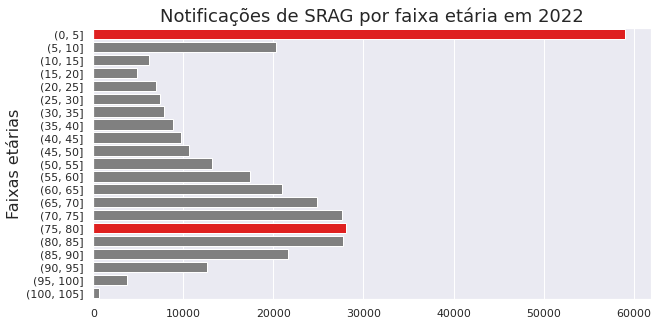

In [221]:
#https://opendatasus.saude.gov.br/dataset/srag-2021-e-2022
# dicionario: https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/pdfs/dicionario_de_dados_srag_hosp_17_02_2022.pdf
# NU_IDADE_N - idade
# SEM_NOT - semana epidemiologica da data de notificacao

srag = pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2022/INFLUD22-04-07-2022.csv',sep=';',low_memory=False)[['NU_IDADE_N', 'SEM_NOT']]

intervalos = pd.cut(srag['NU_IDADE_N'], bins=[x for x in range(0,110,5)])
srag['bins_5_em_5'] = pd.cut(srag['NU_IDADE_N'], bins=[x for x in range(0,110,5)])

srag_grupos_idade = srag.groupby('bins_5_em_5')[['SEM_NOT']].count()

plt.figure(figsize=(10,5))
pal = {interv: "red" if interv == pd.Interval(0,5) or interv == pd.Interval(75,80) else "gray" for interv in srag_grupos_idade.index}
ax = sns.barplot(data=srag_grupos_idade, y=srag_grupos_idade.index, x='SEM_NOT', orient='h', palette=pal)
plt.xticks(rotation=0)
ax.set_ylabel('Faixas etárias',fontsize=16)
ax.set_xlabel('')
ax.set_title('Notificações de SRAG por faixa etária em 2022', fontsize=18)
plt.show()

Como destacado:

* os grupos com maior ocorrência de notificações de SRAG são crianças de 0 a 5 anos, e idosos de 76 a 80 anos. 

* A faixa de 6 a 10 anos também é bastante representativa, mas não se compara à de 0 a 5 anos. 

* A partir dos 60 anos, a quantidade de notificações começa a subir. 

* De 85 anos para cima o valor começa a decrescer, possívelmente por uma caractarística da população (há mais pessoas de 70 anos que de 90, por exemplo).

O gráfico a seguir mostra a situação de Novas notificações de Síndrome Respiratória Aguda Grave **(SRAG) por semana em 2022**. Os grupos, foram divididos em **faixas etárias vacinais** utilizadas na campanha de imunização do Ministério da Saúde:


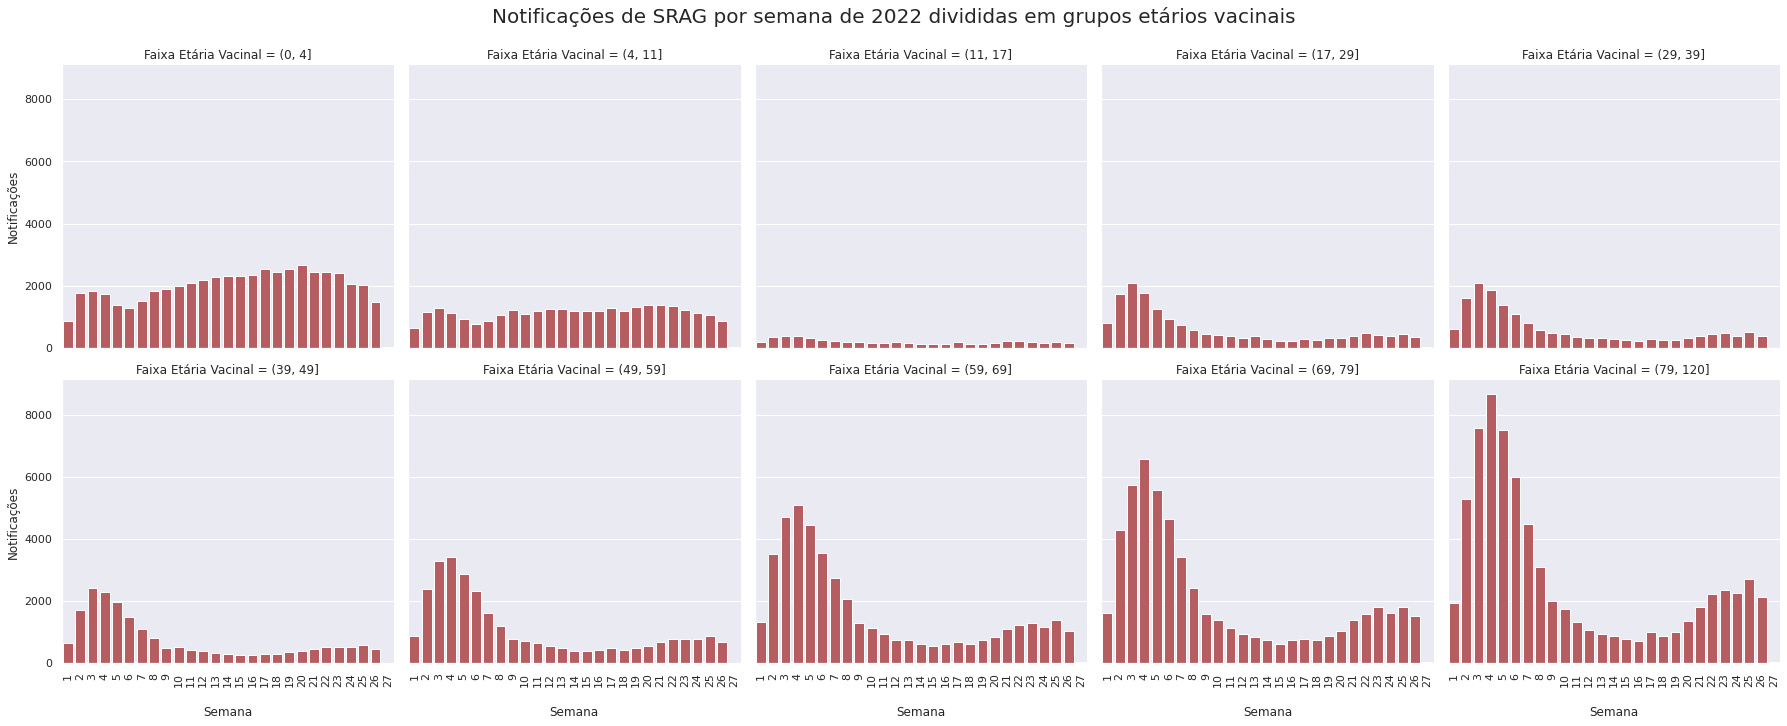

In [222]:
intervalos = pd.cut(srag['NU_IDADE_N'], bins=[0, 4, 11, 17, 29, 39, 49, 59, 69, 79, 120])
srag['Faixa Etária Vacinal'] = pd.cut(srag['NU_IDADE_N'], bins=[0, 4, 11, 17, 29, 39, 49, 59, 69, 79, 120])

g = sns.catplot(data=srag, x='SEM_NOT', kind="count", col='Faixa Etária Vacinal', col_wrap=5, color='r', orient='v')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Notificações de SRAG por semana de 2022 divididas em grupos etários vacinais', fontsize=20)
g.set_axis_labels("\nSemana", "Notificações")
for ax in g.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)

Avaliando separadamente a evolução de cada um dos grupos etários vacinais ao longo de 2022 com relação à notificações de SRAG, podemos evidenciar que:

* existe um pico de notificações no início do ano, relativo à Ômicron.
* durante todo o ano, as notificações de SRAG em crianças de 0 a 4 anos tem PERMANECIDO alta, por volta de 2000 casos por semana.
* nas últimas semanas (com o aumento de casos de covid), o aumento de notificações de SRAG impactou mais em pessoas com mais de 59 anos.

> Em resumo, quem está mais vulnerável nesse momento da pandemia? 
1. **Crianças de 0 a 4 anos** - Faixa etária ainda não possui vacina disponível.
2. **Idosos e imunossuprimidos** - Por possuir resposta imune menor. 

***

# Conclusão

Embora tenhamos uma maior segurança com relação à situação da COVID-19, a pandemia infelizmente ainda não acabou. Ainda temos grupos etários vulneráveis, que podem sofrer com a doença, e o número de novos casos continua alto. 

Isso não significa que precisaremos de um novo lockdown, ou medidas restritivas mais severas... Mas o uso de máscaras é uma medida eficiente e de baixo custo que todos podemos aderir, ao menos em locais fechados. Além disso, promover a ventilação em locais fechados também contribui para diminuir a transmissão.

> Fiquem seguros! :)